# Base Model

TF-IDF seemed to be a reasonable base model and already brings quite good performance on this news texts.

In [1]:
import seaborn as sns
from pandas import read_parquet, DataFrame
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


from data import file
import json

In [2]:
data_train = read_parquet(file.news_articles_cleaned_train)
data_test = read_parquet(file.news_articles_cleaned_test)
data_val = read_parquet(file.news_articles_cleaned_val)

In [3]:
from numpy import atleast_1d

def join(tokens):
    return ' '.join(tokens)

labelEncoder = LabelEncoder()
labelEncoder.fit(data_train["label"])

X_train, y_train = data_train.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_train["label"])).transpose()
X_test, y_test = data_test.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_test["label"])).transpose()
X_val, y_val = data_val.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_val["label"])).transpose()

In [4]:
print("train size     :", X_train.shape[0])
print("test size      :", X_test.shape[0])
print("validation size:", X_val.shape[0])

train size     : 7216
test size      : 2062
validation size: 1031


In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("vec", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("clf", SGDClassifier())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

# Evaluation

In [6]:
from sklearn.metrics import confusion_matrix
from reporting.evaluation import plot_confusion_matrix
sns.set(rc={'figure.figsize': (10, 10)})

### Validation Dataset

In [7]:
count = 100
expected = y_val[:count]
predicted = pipe.predict(X_val[:count])

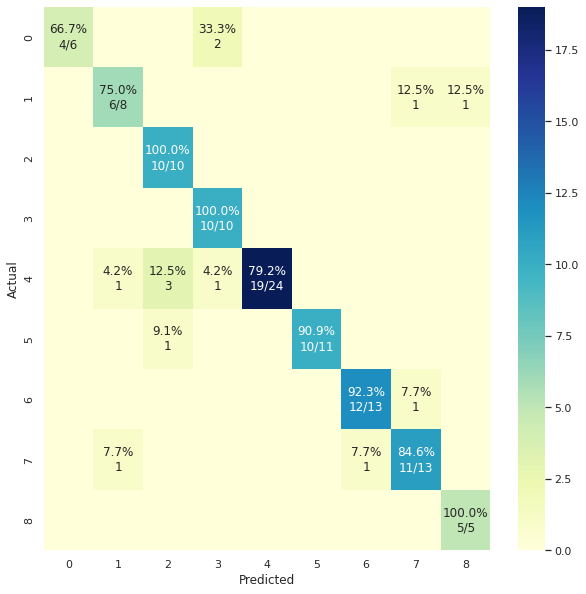

In [8]:
plot_confusion_matrix(expected, predicted)

## Write files for reporting

In [16]:
mapping = dict([(i, labelEncoder.inverse_transform([i])[0]) for i in range(0,8)])
reporting_data = {
    "mapping": mapping,
    "expected": expected.tolist(),
    "predicted": predicted.tolist(),
}

In [17]:
import json
with open(file.reporting_data_report_tfidf, 'w') as f:
    json.dump(reporting_data, f)